# Additional Aerial LiDAR Datasets

This notebook will highlight the additional aerial LiDAR datasets besides USGS 3dep that are available in the `coincident` package and how to grab those datasets' footprints using spatial and temporal search parameters.

Other Supported Catalogs:
- NOAA Coastal LiDAR
- NCALM LiDAR
- NEON LiDAR

In [ ]:
import coincident
import geopandas as gpd

## OpenTopography API

`coincident` supports the use of the [OpenTopo /otCatalog API](https://portal.opentopography.org/apidocs/) to access additional aerial LiDAR data.


opentopo datasets currently supported includes the [NOAA Coastal LiDAR Catalog](https://coast.noaa.gov/htdata/lidar1_z/) and [NCALM Aerial LiDAR Catalog](https://calm.geo.berkeley.edu/ncalm/dtc.html). 

```{note}
The NCALM Aerial LiDAR Catalog also includes user-submitted flights
```

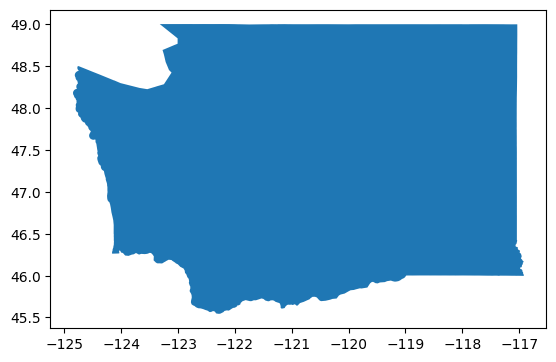

In [2]:
# first, we'll search for NOAA Coastal LiDAR missions in Washington
# we'll inspect 2018 arbitrarily
aoi = gpd.read_file(
    "https://raw.githubusercontent.com/unitedstates/districts/refs/heads/gh-pages/states/WA/shape.geojson"
)
date = "2018"
aoi.plot();

In [3]:
gf_noaa = coincident.search.search(dataset="noaa", intersects=aoi, datetime=[date])

In [4]:
gf_noaa

,id,title,start_datetime,end_datetime,geometry
0,9536,"2018 WA DNR Lidar: Green River Watershed, WA",2018-11-11,2018-11-12,"POLYGON ((-121.82611 47.3587, -121.85992 47.33..."
1,9546,2018 WA DNR Topobathy Lidar: Tacoma Water Serv...,2018-05-27,2018-05-28,"POLYGON ((-121.7511 47.32611, -121.77838 47.30..."
2,9549,2017 WA DNR Lidar: Tacoma Water Service Area -...,2017-12-05,2018-11-12,"POLYGON ((-122.37958 47.06531, -122.37311 47.0..."
3,9554,"2018 WA DNR Lidar: Yakima Basin North, WA",2018-07-24,2018-08-06,"POLYGON ((-120.54498 47.17468, -120.54089 47.1..."
4,9605,"2018 USFS Lidar: Tieton Basin, WA",2018-07-16,2018-07-18,"POLYGON ((-121.19459 46.37311, -121.15364 46.3..."
5,9673,"2018 USFS Lidar: Methow Basin, WA",2018-07-19,2018-10-11,"POLYGON ((-120.03089 48.2396, -120.05499 48.25..."
6,8932,"2018 OLC Lidar: Morrow County, OR",2018-10-03,2018-11-15,"MULTIPOLYGON (((-119.43372 45.91931, -119.5142..."
7,9211,2018 - 2019 USGS Lidar: Washington FEMA QL2,2018-08-05,2019-05-06,"MULTIPOLYGON (((-117.22388 47.26031, -117.2282..."


In [5]:
gf_noaa.explore(column="title", cmap="Set1")

In [6]:
# now, let's see if there were any NCALM missions from the same year
gf_ncalm = coincident.search.search(dataset="ncalm", intersects=aoi, datetime=[date])

In [7]:
gf_ncalm

,id,title,start_datetime,end_datetime,geometry
0,OTLAS.072019.6339.1,"High-Resolution Mapping of Goat Rock Volcano, WA",2018-09-19,2018-09-20,"POLYGON ((-121.46701 46.48376, -121.45914 46.4..."
1,OTLAS.112018.26910.1,Eagle Creek Fire Area in the Columbia River Go...,2018-05-03,2018-05-06,"MULTIPOLYGON (((-122.12419 45.58219, -121.9854..."


In [8]:
gf_ncalm.explore(column="id", cmap="Set3")

## NEON API

We also support the use of the [NEON Python API](https://www.neonscience.org/resources/learning-hub/tutorials/neon-api-intro-requests-py).

```{warning}
Searching large areas and/or large time periods in the NEON catalog will take a long time due to the limited spatiotemporal search supported by the API.
```

In [9]:
%%time
gf_neon = coincident.search.search(dataset="neon", intersects=aoi, datetime=[date])

/home/jehayes/mambaforge/envs/coincident/lib/python3.12/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


CPU times: user 1.17 s, sys: 78 ms, total: 1.24 s
Wall time: 7.6 s


In [10]:
# the above warning is expected as the NEON search function uses sjoin nearest in a WGS
# you can remove this warning with the below
import warnings

warnings.filterwarnings(
    "ignore", message=".*Geometry is in a geographic CRS.*", category=UserWarning
)
gf_neon = coincident.search.search(dataset="neon", intersects=aoi, datetime=[date])

In [11]:
gf_neon

,id,title,start_datetime,end_datetime,product_url,geometry
0,ABBY,Abby Road NEON,2018-07,2018-07,https://data.neonscience.org/api/v0/data/DP3.3...,"POLYGON ((-122.40147 45.70088, -122.23192 45.7..."
1,WREF,Wind River Experimental Forest NEON,2018-07,2018-07,https://data.neonscience.org/api/v0/data/DP3.3...,"POLYGON ((-122.09866 45.77605, -121.7776 45.77..."


In [12]:
m = gf_noaa.explore(color="blue")
gf_ncalm.explore(m=m, color="black")
gf_neon.explore(m=m, color="deeppink")